/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

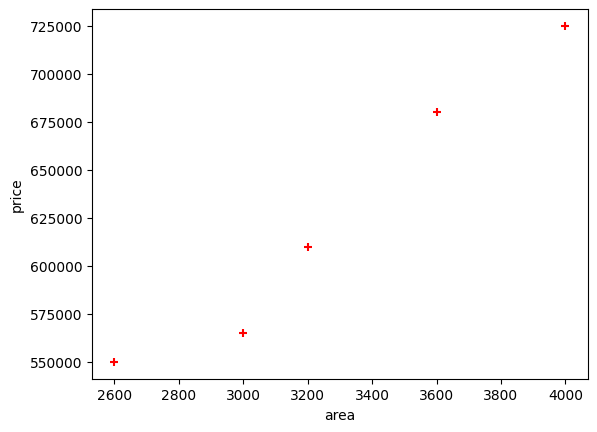

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/housing_area_price.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_

"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])

In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('/content/homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
df1 = pd.read_csv('/content/canada_per_capita_income.csv')

# Prepare the data
X = df1.year.values.reshape(-1, 1)  # Features (year)
y = df1['per capita income (US$)']   # Target (per capita income)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict per capita income for 2020
year_2020 = [[2020]]
predicted_income = model.predict(year_2020)

print(f"Predicted per capita income for Canada in 2020: {predicted_income[0]:.2f}")


Predicted per capita income for Canada in 2020: 41288.69


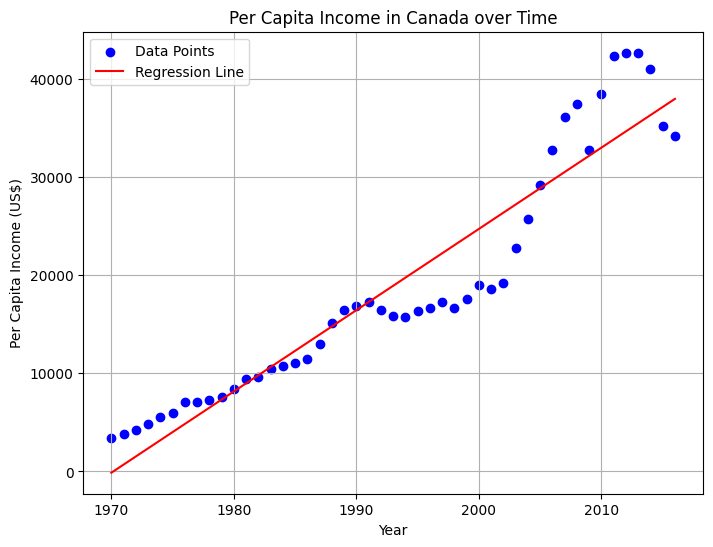

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset (canada_per_capita_income.csv)
df1 = pd.read_csv('/content/canada_per_capita_income.csv')

# Prepare the data
X = df1.year.values.reshape(-1, 1)  # Features (year)
y = df1['per capita income (US$)']   # Target (per capita income)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points') # Now using the correct X and y
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Per Capita Income in Canada over Time')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/salary.csv')

# Prepare the data
X = df.iloc[:, :-1].values  # Features (years of experience)
y = df.iloc[:, 1].values    # Target (salary)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer object with strategy as mean
X = imputer.fit_transform(X) # Fit and transform the imputer on feature data 'X'

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict salary for 12 years of experience
years_experience = [[12]]
predicted_salary = model.predict(years_experience)

print(f"Predicted salary for 12 years of experience: {predicted_salary[0]:.2f}")

Predicted salary for 12 years of experience: 139980.89


In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/hiring.csv')

# Handle missing values
# Convert 'experience' column to numeric, replacing non-numeric with NaN
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')

imputer = SimpleImputer(strategy='mean')
df['experience'] = imputer.fit_transform(df[['experience']])
df['test_score(out of 10)'] = imputer.fit_transform(df[['test_score(out of 10)']])

# Prepare the data
X = df.drop('salary($)', axis='columns')
y = df['salary($)']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict salaries for the given candidates
candidate1 = [[2, 9, 6]]
candidate2 = [[12, 10, 10]]

predicted_salary1 = model.predict(candidate1)
predicted_salary2 = model.predict(candidate2)

print(f"Predicted salary for candidate 1: ${predicted_salary1[0]:.2f}")
print(f"Predicted salary for candidate 2: ${predicted_salary2[0]:.2f}")

Predicted salary for candidate 1: $62400.54
Predicted salary for candidate 2: $63416.00


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['experience']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv('/content/1000_Companies.csv')

# Separate features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

# Encode categorical data (State)
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# Avoid dummy variable trap (remove one encoded column)
X = X[:, 1:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict profit for the given values
new_prediction = regressor.predict([[1, 0, 91694.48, 515841.3, 11931.24]])
print(f"Predicted Profit: {new_prediction[0]:.2f}")


Predicted Profit: 433156.58
